In [33]:
# import essential libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns

import os
import pickle
import joblib

In [2]:
# import library for normalizing, modeling, evaluate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [8]:
# read dataset
train = pd.read_csv('train_data.csv', index_col=0)
test = pd.read_csv('test_data.csv', index_col=0)

In [10]:
X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]

## Model Selection

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [17]:
models = []
models.append(LogisticRegression(solver='liblinear'))
models.append(SVC())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(GaussianNB())
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

In [18]:
acc_list = []
auc_list = []
cm_list = []

In [19]:
for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(Y_test, Y_pred))

In [20]:
# Accuracy and AUC
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.901349,0.64
1,SVM,0.907985,0.65
2,KNN,0.917054,0.71
3,Decision Tree,1.000000,1.00
4,Random Forest,1.000000,1.00
5,Naive Bayes,0.833002,0.68


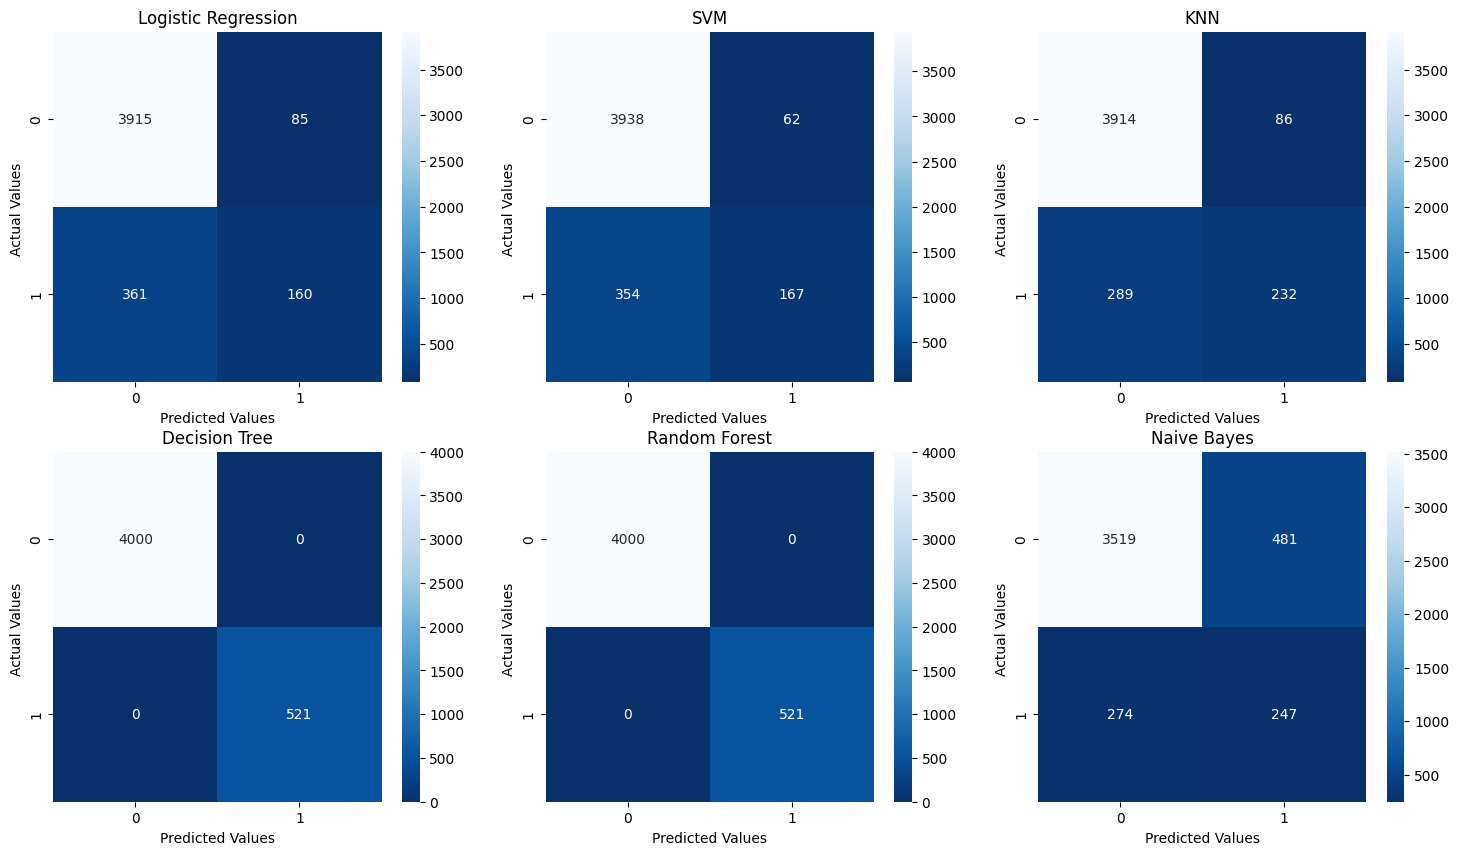

In [30]:
# Plot confusion matrix
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, fmt="d", cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values ')

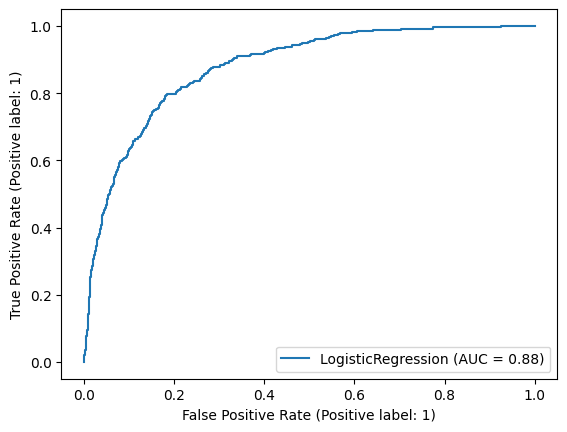

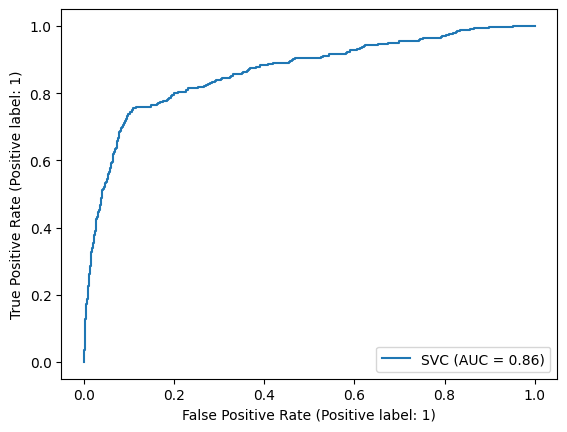

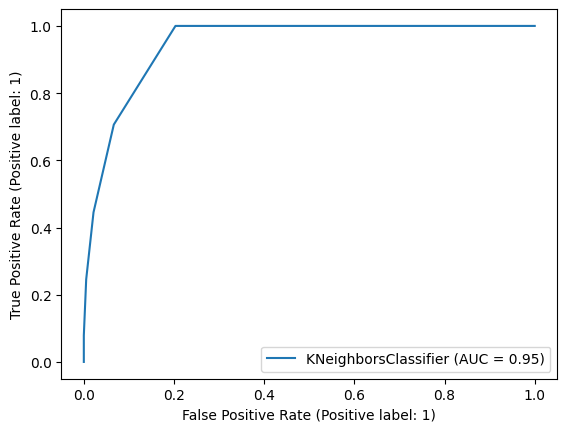

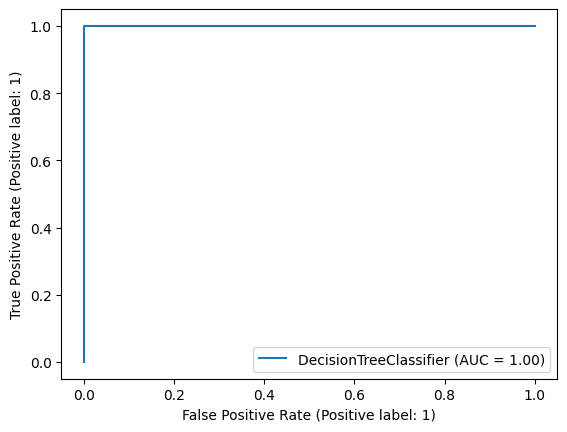

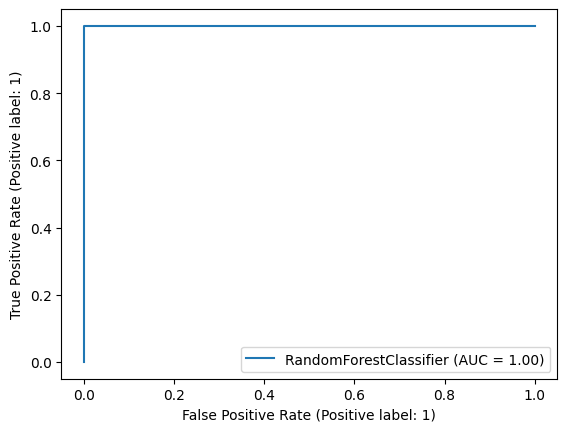

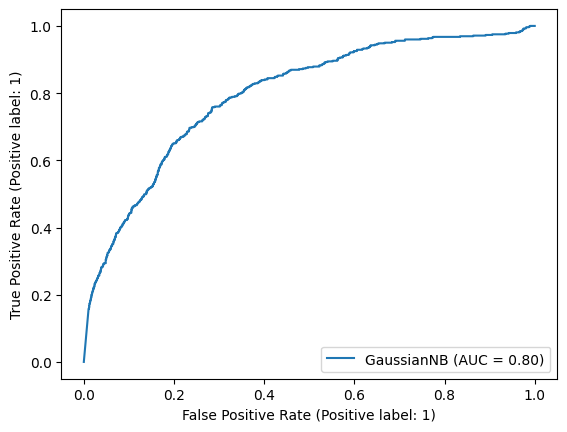

In [31]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

for model in models:
    RocCurveDisplay.from_estimator(model, X_test, Y_test)

In [34]:
def save_model(model, destination):
    folder_name = "/".join(destination.split('/')[:-1])
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    joblib.dump(model, destination)

In [39]:
for model, name in zip(models, model_list):
    destination = './models/' + name + ".joblib"
    save_model(model, destination)